In [1]:
from astropy import units as u
from mw_plot import MWSkyMap, MWSkyMapBokeh
import matplotlib.pyplot as plt
import pandas as pd
from bokeh.io import output_file, show
import numpy as np
import os
from datetime import datetime

In [2]:
cwd = os.getcwd() #folder to save file

today = datetime.now().strftime("%Y%m%d") #to date the saved file

In [3]:
mw1 = MWSkyMap(projection="aitoff", grayscale=False,figsize=(20,20)
mw1.title = "High Mass Xray Binaries in The Galaxy"

In [4]:
HMXB_table = pd.read_csv('HMXB_practice_analysis.csv')
HMXB_table

#include cygnus x-1
cygnus = HMXB_table[HMXB_table['Name'] == 'Cyg X-1']
cygnus

source_id          ra  ra_error        dec  dec_error      pmra  \
25  2059383668236814720  299.590295  0.010938  35.201579   0.013003 -3.812385   

    pmra_error     pmdec  pmdec_error  parallax  ...       SpType  Mod_SpType  \
25    0.014574 -6.309893     0.017453  0.443902  ...  O9.7Iabpvar   xkcd:blue   

      SpColor  Mass_compact  M_compact_lower  M_compact_upper  Mass_companion  \
25  xkcd:blue          21.2             19.0             23.4             NaN   

    M_companion_lower  M_companion_upper     Name  
25                NaN                NaN  Cyg X-1  

[1 rows x 42 columns]

In [11]:
ra = HMXB_table['ra'].to_list()
dec = HMXB_table['dec'].to_list()
color = HMXB_table['SpColor'].to_list()

#same for cygnus
cyg_ra = cygnus['ra'].to_list()
cyg_dec = cygnus['dec'].to_list()
cyg_color = 'xkcd:light blue' #im choosing a different one for this
cyg_size = 30 # 30 solar mass for optical counterpart

In [6]:
groups = [
    ("O I-III", ['xkcd:blue'], 'xkcd:sky blue'),
    ("B I-III", ['xkcd:red'], 'xkcd:red'),
    ("Oe", ['xkcd:bright Blue', 'xkcd:dark blue'], 'xkcd:cobalt'),
    ("Be I-III", ['xkcd:green', 'xkcd:bright green', 'xkcd:dark green'], 'xkcd:green')
]

In [34]:
mw1 = MWSkyMap(projection="aitoff", grayscale=False,figsize=(15,10),grid='galactic')
mw1.title = "High Mass Xray Binaries in The Galaxy"


# fig = plt.figure(figsize=(20,20))
# ax1 = fig.add_subplot(111, projection="aitoff")

size = [50 if c =='xkcd:blue' else 16 for c in color]
mw1.scatter(ra * u.degree, dec * u.degree, c=color, s=size)
mw1.scatter(cyg_ra *u.degree,cyg_dec*u.degree,c=cyg_color,s=cyg_size)
mw1.transform(ax1)

ax1.scatter(ra, dec,color='r',s=3)
ax1.set_ylabel(r'Galactic Latitude (deg)')
ax1.set_xlabel(r"Galactic Longitude (deg)")

#ax1.scatter(ra, dec,color='r',s=3)



Text(0.5, 35.67032790015979, 'Galactic Longitude (deg)')

# Plot the Galactic Height 

The height is simply given by 
$$
z = d \cdot sin(b)
$$
Where d is the distance from the source to our sun. and b is the galactic latitude in radians. My distance is in Kiloparsecs so to get it in units parsecs, the height is multiplied by 1000. I am also ploting sources with reasonable distances, those who's parallax (1/distance) over parallax error is greater than 5.0.

$$
 \frac{\omega}{\sigma_\omega} >= 5.0
$$

In [8]:
z = HMXB_table['distance']*np.sin(np.radians(HMXB_table['b']))
cyg_z = cygnus['distance']*np.sin(np.radians(cygnus['b']))

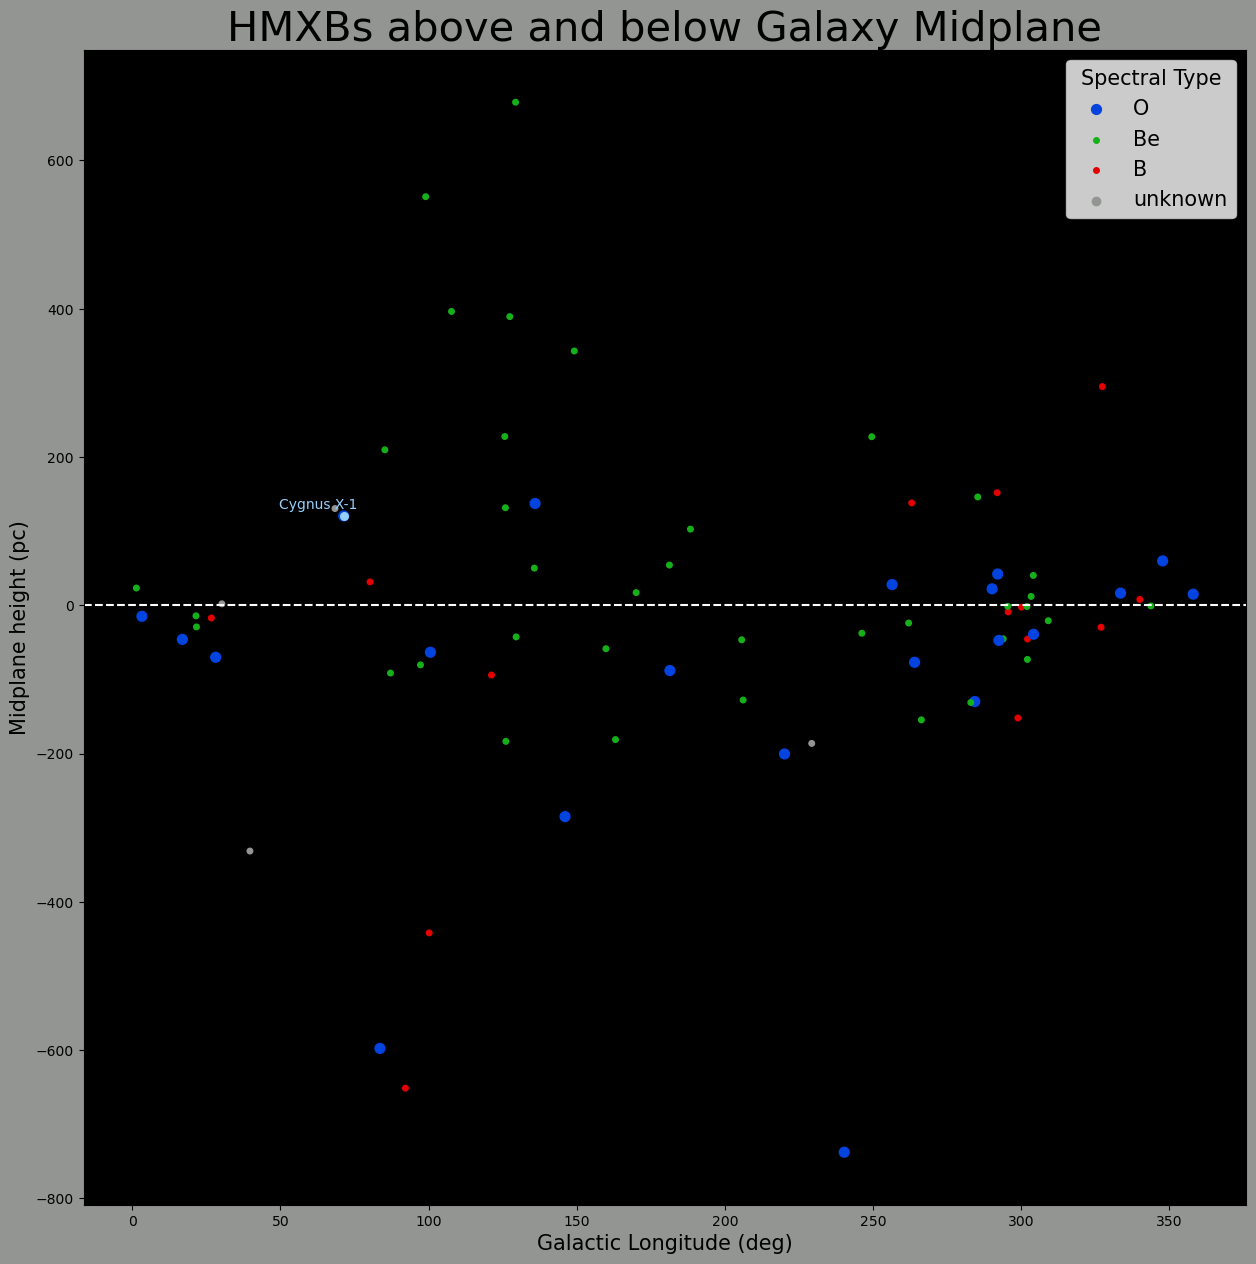

In [32]:
def plot_height(table):
    prlx_mask = table['parallax']/table['parallax_error'] >=5.0
    table = table[prlx_mask]
    dist = table['distance']
    long = table['l']
    lat = table['b']

    height = dist*np.sin(np.radians(lat))
    
    
    color = table['SpColor']
    fig = plt.figure(figsize=(15,15),facecolor='xkcd:grey')
    ax = fig.add_subplot(111)
    ax.set_facecolor('xkcd:black')
    size = [50 if c =='xkcd:blue' else 16 for c in color]
    plt.scatter(long,height*1000,c=color,s=size) # times 1000 for units parsec
    plt.scatter(cygnus['l'],cyg_z*1000,c=cyg_color,s=cyg_size)
    plt.text(cygnus['l']-22,(cyg_z*1000)+10, s='Cygnus X-1',color='xkcd:light blue')
    
    plt.scatter([], [], color='xkcd:blue', label='O',s=50)
    plt.scatter([], [], color='xkcd:green', label='Be',s=16)
    plt.scatter([], [], color='xkcd:red', label='B',s=16)
    plt.scatter([], [], color='xkcd:grey', label='unknown')

    fontsize= 15
    plt.legend(title='Spectral Type',loc='upper right',fontsize=fontsize,title_fontsize=fontsize)#bbox_to_anchor= (1.04,0.5))
    plt.axhline(y=0, color= 'xkcd:white',linestyle='--')
    plt.xlabel('Galactic Longitude (deg)',fontsize=fontsize)
    plt.ylabel('Midplane height (pc)',fontsize=fontsize)
    plt.title("HMXBs above and below Galaxy Midplane",fontsize=2*fontsize)
    plt.savefig(cwd+"/Data Management Course/"+f"height_{today}.png",bbox_inches='tight')
    plt.show()
    return None
plot_height(HMXB_table)

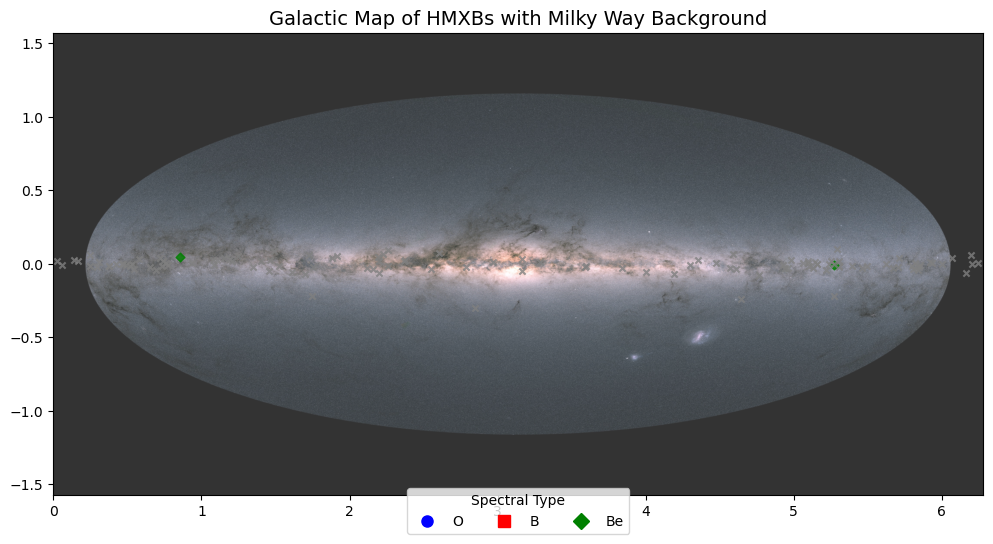

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = HMXB_table

# Extract relevant columns
gal_l = data['l']  # Galactic longitude
gal_b = data['b']  # Galactic latitude
mod_sptype = data['SpType']  # Spectral types

# Define color and marker maps for spectral types
color_map = {'O': 'blue', 'B': 'red', 'Be': 'green'}
marker_map = {'O': 'o', 'B': 's', 'Be': 'D'}

# Initialize the figure and axis with Aitoff projection
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

# Convert galactic longitude from degrees to radians
gal_l_rad = np.radians(gal_l)
gal_b_rad = np.radians(gal_b)

# Add the Milky Way galaxy background image
galaxy_image_path = '/home/karan/Documents/UvA/Thesis/Gaia_s_sky_in_colour.jpg'  # Update with your galaxy image path
galaxy_image = plt.imread(galaxy_image_path)

# Set the extent of the background image in Aitoff projection
extent = (0, 2*np.pi, -np.pi / 2, np.pi / 2)
ax.imshow(galaxy_image, extent=extent, aspect='auto', alpha=0.8, zorder=0)

# Plot each star with the appropriate color and marker
for long, lat, sp_type in zip(gal_l_rad, gal_b_rad, mod_sptype):
    color = color_map.get(sp_type, 'gray')  # Default to gray if unknown type
    marker = marker_map.get(sp_type, 'x')  # Default marker
    ax.scatter(long, lat, color=color, marker=marker, s=20, alpha=0.8, zorder=1)

# Add grid lines and labels

#ax.set_xticklabels(['14h', '16h', '18h', '20h', '22h', '0h', '2h', '4h', '6h', '8h', '10h'])

# Add a legend
handles = []
for sp_type, color in color_map.items():
    marker = marker_map.get(sp_type, 'o')
    handle = plt.Line2D(
        [], [], color=color, marker=marker, linestyle='', markersize=8, label=sp_type
    )
    handles.append(handle)
ax.legend(handles=handles, title='Spectral Type', loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)

# Set the title
plt.title("Galactic Map of HMXBs with Milky Way Background", fontsize=14)

# Display the plot
plt.show()
